In [1]:
#import pandas to read spreadsheet data
import pandas as pd
#import splitting function
from sklearn.model_selection import train_test_split
#import linear regression class
from sklearn.linear_model import LinearRegression
#import matplot to plot the predicted data compaired to true values
import matplotlib.pyplot as plt
#import r-squared value metric to check accuracy of predictions
from sklearn.metrics import r2_score

In [2]:
#read file data and save to a variable
data = pd.read_csv('Fish.csv')
print (data)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [3]:
#manipulate data and convert categoric species into numeric value
data['Species'] = data['Species'].astype('category')
data['Species'] = data['Species'].cat.codes
print(data)

     Species  Weight  Length1  Length2  Length3   Height   Width
0          0   242.0     23.2     25.4     30.0  11.5200  4.0200
1          0   290.0     24.0     26.3     31.2  12.4800  4.3056
2          0   340.0     23.9     26.5     31.1  12.3778  4.6961
3          0   363.0     26.3     29.0     33.5  12.7300  4.4555
4          0   430.0     26.5     29.0     34.0  12.4440  5.1340
..       ...     ...      ...      ...      ...      ...     ...
154        5    12.2     11.5     12.2     13.4   2.0904  1.3936
155        5    13.4     11.7     12.4     13.5   2.4300  1.2690
156        5    12.2     12.1     13.0     13.8   2.2770  1.2558
157        5    19.7     13.2     14.3     15.2   2.8728  2.0672
158        5    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [4]:
#check for any null values
data.isnull().sum()
#none means ready for regression

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
#Set X to be all independent variables/features x1 through xn
X = data.drop(columns = 'Weight')
#set Y to be the dependent variable
Y = data['Weight']
print (X)
print (Y)

     Species  Length1  Length2  Length3   Height   Width
0          0     23.2     25.4     30.0  11.5200  4.0200
1          0     24.0     26.3     31.2  12.4800  4.3056
2          0     23.9     26.5     31.1  12.3778  4.6961
3          0     26.3     29.0     33.5  12.7300  4.4555
4          0     26.5     29.0     34.0  12.4440  5.1340
..       ...      ...      ...      ...      ...     ...
154        5     11.5     12.2     13.4   2.0904  1.3936
155        5     11.7     12.4     13.5   2.4300  1.2690
156        5     12.1     13.0     13.8   2.2770  1.2558
157        5     13.2     14.3     15.2   2.8728  2.0672
158        5     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]
0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64


In [6]:
#split the data into a training set and testing set for associated X and Y values 20% saved for testing (random state is given to make split reproduceable)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [7]:
#create linear regression type object
lr = LinearRegression()
#fit it to the training set
lr.fit(X_train, Y_train)

LinearRegression()

In [8]:
#set variables for the constant (value c) and the coefficients/weights (array of values w)
b = lr.intercept_
w = lr.coef_
print(b)
print(w)

-598.4423212004818
[ 36.26377312  40.77065826  36.70419066 -53.36938011  53.29669043
  -2.49236556]


In [9]:
#predict outputs of dependent variables for X dataset of feature values using developed linear regression function
Y_pred_train = lr.predict(X_train)
print(Y_pred_train)

[ 1.07645211e+03  3.62927194e+02  5.87013713e+02  2.70434776e+02
  4.10520808e+02  6.47512199e+02  6.86220592e+02  1.47142620e+02
  6.26495581e+02 -6.88818017e+01  2.21254193e+02  7.06997152e+02
 -1.73369036e+01  2.69964160e+02  3.12697352e+02  3.43372405e+02
  6.51295189e+02  4.16156537e+02  8.33641866e+02 -1.14916036e+02
 -6.49148062e+01  3.36841119e+02  7.53702337e+01  1.67606008e+02
  4.18238285e+02  5.12741228e+02 -1.32268857e+02  5.68133279e+02
 -1.01738489e+02 -1.40897751e+02  1.80886062e+02  1.67922551e+02
  1.36007082e+02 -1.64583287e+02  1.05184141e+03  9.07352234e+02
  7.63579882e+02  2.63831881e+02  2.48632672e+02  2.07821675e+02
  1.51923311e+02  8.37824126e+02  3.95025872e+02  3.11691655e+02
  2.36995191e+02  2.64820554e+02  5.17016573e+02  7.64095386e+02
  6.25059941e+02  6.85964378e+02  6.09949002e+02  5.98295100e+02
  7.93501733e+01  3.82928020e+02  2.69786755e+00  4.17735421e+02
 -1.69165672e+01  6.25433091e+02  4.85646639e+02  2.59067773e+02
  5.00461649e-01  1.12955

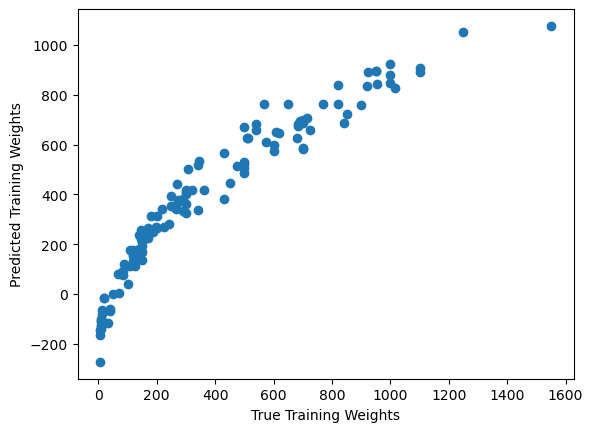

In [10]:
#plot the predicted y-values against true y-values
plt.scatter(Y_train, Y_pred_train)
plt.xlabel("True Training Weights")
plt.ylabel("Predicted Training Weights")
plt.show()

In [11]:
#check accuracy of predictions using r-squared value
r2_score(Y_train, Y_pred_train)

0.8967797666316315

In [12]:
#Now for the test data
#predict outputs of dependent variables for X_test dataset using developed linear regression function
Y_pred_test = lr.predict(X_test)
print(Y_pred_test)

[ 423.60513597  193.62263768  204.12102611  223.34559697  627.77601347
  789.73138993  826.16580976  499.26498584  957.9859744   125.84434988
  350.10241955  650.02329277  928.65009049  906.1651415     5.90476626
  108.62941751  237.75002354 1076.45210736  157.3743758   680.91986694
    6.33276855  537.11422115  159.96019504 1171.34659836   83.34418888
  489.03062419  676.96352572  434.18544397  807.2085174  -116.19500606
  586.77382665  127.18412464]


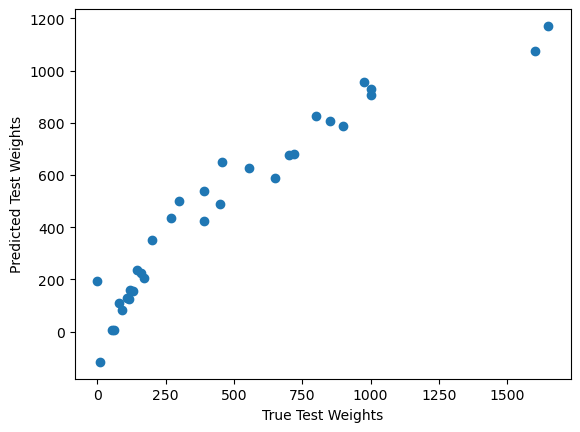

In [13]:
#plot the predicted y-values against true y-values for final test
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("True Test Weights")
plt.ylabel("Predicted Test Weights")
plt.show()

In [14]:
#check accuracy of predictions on test_data using r-squared value
r2_score(Y_test, Y_pred_test)

0.87349522841804